# Dicionário de dados:

| Variável | Descrição |
| --- | --- |
| ID | Matrícula do funcionário |
| Funcionário_deixou_a_empresa | Marcação sem funcionário deixou a empresa recentemente |
| Idade | Idade do funcionário |
| Frequência de Viagens | Frequência de viagens a trabalho do funcionário |
| Distância_do_trabalho | Distância em Km até o trabalho |
| Formação | Nível de formação |
| E-Sat | Satisfação com o clima organizacional |
| Gênero | Gênero do funcionário |
| Estado_Civil | Estado civil do funcionário |
| Salário | Salário mensal |
| Qte_Empresas_Trabalhadas | Quantidade de empresas que o funcionário já trabalhou |
| Faz_hora_extras? | Se funcionário costuma fazer hora extra |
| Perc_de_aumento | Percentual de aumento de salário de 2018 a 2019 |
| Qte_ações_da_empresa | Qte de lotes de ações da empresa que o funcionário possui |
| Tempo_de_carreira | Tempo em anos que o funcionário tem de carreira |
| Horas_de_treinamento | Qte de horas de treinamento que o funcionário teve no ano passado |
| Equilibrio_de_Vida | Nota que o funcionário deu para seu equilibrio entre vida pessoal e profissional |
| Tempo_de_empresa | Tempo em anos que o funcionário trabalha na empresa |
| Anos_no_mesmo_cargo | Qte de tempo em anos que o funcionário atua no mesmo cargo |
| Anos_desde_a_ultima_promocao | Qte de tempo em anos que o funcionário teve a última promoção |
| Anos_com_o_mesmo_chefe | Qte de tempo em anos que o funcionário responde para o mesmo chefe |


In [47]:
# importando as bibliotecas necessárias
import pandas as pd
import numpy as np

In [48]:
# carregando os dados de turnover com 1 linha de cabeçalho
df = pd.read_excel("Base_RH.xlsx", sheet_name="Base")

In [49]:
# visualizando os dados
df.head()

,ID,Funcionário_deixou_a_empresa,Idade,Frequência de Viagens,Distância_do_trabalho,Formação,E-Sat,Gênero,Estado_Civil,Salário,...,Faz_hora_extras?,Perc_de_aumento,Qte_ações_da_empresa,Tempo_de_carreira,Horas_de_treinamento,Equilibrio_de_Vida,Tempo_de_empresa,Anos_no_mesmo_cargo,Anos_desde_a_ultima_promocao,Anos_com_o_mesmo_chefe
0,1,Sim,41,Viaja raramente,1,Ensino Técnico,Médio,M,Solteiro,5993,...,Sim,11,0,8,0,Ruim,6,4,0,5
1,2,Não,49,Viaja frequentemente,8,Ensino Médio,Alto,H,Casado,5130,...,Não,23,1,10,3,Muito bom,10,7,1,7
2,3,Sim,37,Viaja raramente,2,Ensino Técnico,Muito Alto,H,Solteiro,2090,...,Sim,15,0,7,3,Muito bom,0,0,0,0
3,4,Não,33,Viaja frequentemente,3,Mestrado,Muito Alto,M,Casado,2909,...,Sim,11,0,8,3,Muito bom,8,7,3,0
4,5,Não,27,Viaja raramente,2,Ensino Médio,Baixo,H,Casado,3468,...,Não,12,1,6,3,Muito bom,2,2,2,2


### Análise Exploratória de Dados

In [50]:
# verificando os tipos de dados de nossa variáveis
df.dtypes

ID                               int64
Funcionário_deixou_a_empresa    object
Idade                            int64
Frequência de Viagens           object
Distância_do_trabalho            int64
Formação                        object
E-Sat                           object
Gênero                          object
Estado_Civil                    object
Salário                          int64
Qte_Empresas_Trabalhadas         int64
Faz_hora_extras?                object
Perc_de_aumento                  int64
Qte_ações_da_empresa             int64
Tempo_de_carreira                int64
Horas_de_treinamento             int64
Equilibrio_de_Vida              object
Tempo_de_empresa                 int64
Anos_no_mesmo_cargo              int64
Anos_desde_a_ultima_promocao     int64
Anos_com_o_mesmo_chefe           int64
dtype: object

In [51]:
# verificando se há valores faltantes
df.isnull().sum()

ID                              0
Funcionário_deixou_a_empresa    0
Idade                           0
Frequência de Viagens           0
Distância_do_trabalho           0
Formação                        0
E-Sat                           0
Gênero                          0
Estado_Civil                    0
Salário                         0
Qte_Empresas_Trabalhadas        0
Faz_hora_extras?                0
Perc_de_aumento                 0
Qte_ações_da_empresa            0
Tempo_de_carreira               0
Horas_de_treinamento            0
Equilibrio_de_Vida              0
Tempo_de_empresa                0
Anos_no_mesmo_cargo             0
Anos_desde_a_ultima_promocao    0
Anos_com_o_mesmo_chefe          0
dtype: int64

In [52]:
df.columns

Index(['ID', 'Funcionário_deixou_a_empresa', 'Idade', 'Frequência de Viagens',
       'Distância_do_trabalho', 'Formação', 'E-Sat', 'Gênero', 'Estado_Civil',
       'Salário', 'Qte_Empresas_Trabalhadas', 'Faz_hora_extras?',
       'Perc_de_aumento', 'Qte_ações_da_empresa', 'Tempo_de_carreira',
       'Horas_de_treinamento', 'Equilibrio_de_Vida', 'Tempo_de_empresa',
       'Anos_no_mesmo_cargo', 'Anos_desde_a_ultima_promocao',
       'Anos_com_o_mesmo_chefe'],
      dtype='object')

### **Funcionário_deixou_a_empresa X Variáveis Qualitativas Categóricas** (IV)

In [53]:
# Selecionando as variáveis qualitativas sem nossa variável alvo: "Funcionário_deixou_a_empresa", para calcular o iv

for i in df.drop(
    columns=[
        "Funcionário_deixou_a_empresa",
        "ID",
        "Idade",
        "Distância_do_trabalho",
        "Salário",
        "Qte_Empresas_Trabalhadas",
        "Perc_de_aumento",
        "Qte_ações_da_empresa",
        "Tempo_de_carreira",
        "Horas_de_treinamento",
        "Tempo_de_empresa",
        "Anos_no_mesmo_cargo",
        "Anos_desde_a_ultima_promocao",
        "Anos_com_o_mesmo_chefe",
    ]
).columns:
    df_woe_iv = (
        pd.crosstab(df[i], df["Funcionário_deixou_a_empresa"], normalize="columns")
        .assign(woe=lambda dfx: np.log(dfx["Sim"] / dfx["Não"]))
        .assign(iv=lambda dfx: np.sum(dfx["woe"] * (dfx["Sim"] - dfx["Não"])))
    )

    print(df_woe_iv, "\n------------------------------------------------------------")

Funcionário_deixou_a_empresa       Não       Sim       woe        iv
Frequência de Viagens                                               
Não viaja                     0.111922  0.050633 -0.793202  0.120868
Viaja frequentemente          0.168694  0.291139  0.545714  0.120868
Viaja raramente               0.719384  0.658228 -0.088844  0.120868 
------------------------------------------------------------
Funcionário_deixou_a_empresa       Não       Sim       woe        iv
Formação                                                            
Doutorado                     0.034874  0.021097 -0.502617  0.016505
Ensino Médio                  0.112733  0.130802  0.148659  0.016505
Ensino Superior               0.383617  0.417722  0.085170  0.016505
Ensino Técnico                0.193025  0.185654 -0.038936  0.016505
Mestrado                      0.275750  0.244726 -0.119357  0.016505 
------------------------------------------------------------
Funcionário_deixou_a_empresa       Não       Sim

,iv
Features,
Gênero,0.006496
Formação,0.016505
Equilibrio_de_Vida,0.066981
E-Sat,0.099886
Frequência de Viagens,0.120868
Estado_Civil,0.218898
Faz_hora_extras?,0.400183


<Figure size 1000x1200 with 0 Axes>

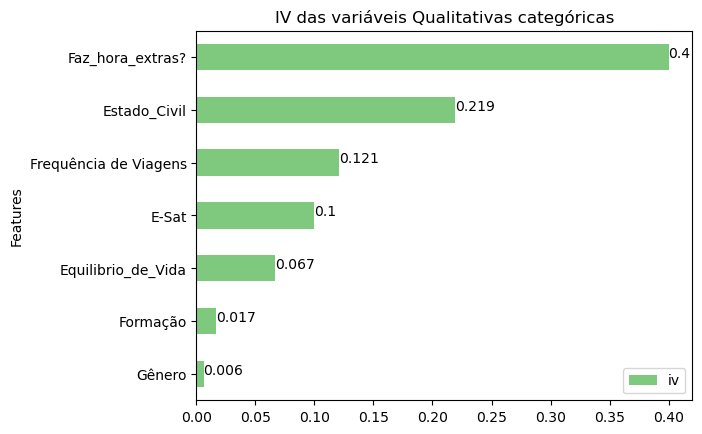

In [54]:
# Plotando grafico do IV com matplotlib

# variáveis categóricas
from matplotlib import pyplot as plt


columns_cat = df.drop(
    columns=[
        "Funcionário_deixou_a_empresa",
        "ID",
        "Idade",
        "Distância_do_trabalho",
        "Salário",
        "Qte_Empresas_Trabalhadas",
        "Perc_de_aumento",
        "Qte_ações_da_empresa",
        "Tempo_de_carreira",
        "Horas_de_treinamento",
        "Tempo_de_empresa",
        "Anos_no_mesmo_cargo",
        "Anos_desde_a_ultima_promocao",
        "Anos_com_o_mesmo_chefe",
    ]
).columns

# Lista para armazenar o IV
iv = []

# Loop para calcular o IV de cada variável
for i in columns_cat:
    df_woe_iv = (
        pd.crosstab(df[i], df["Funcionário_deixou_a_empresa"], normalize="columns")
        .assign(woe=lambda dfx: np.log(dfx["Sim"] / dfx["Não"]))
        .assign(iv=lambda dfx: np.sum(dfx["woe"] * (dfx["Sim"] - dfx["Não"])))
    )
    iv.append(df_woe_iv["iv"].iloc[0])

# Criando um dataframe com as variáveis e seus respectivos IVs
df_iv_qualitativas = (
    pd.DataFrame({"Features": columns_cat, "iv": iv})
    .set_index("Features")
    .sort_values(by="iv")
)

display(df_iv_qualitativas)

# Plot
# Figura
plt.figure(figsize=(10, 12))
df_iv_qualitativas.plot(
    kind="barh", title="IV das variáveis Qualitativas categóricas", colormap="Accent"
)
for index, value in enumerate(list(round(df_iv_qualitativas["iv"], 3))):
    plt.text(value, index, str(value))
plt.legend(loc="lower right")
plt.show()

In [55]:
# Usando o plotly
import plotly.express as px

# variáveis categóricas
columns_cat = df.drop(
    columns=[
        "Funcionário_deixou_a_empresa",
        "ID",
        "Idade",
        "Distância_do_trabalho",
        "Salário",
        "Qte_Empresas_Trabalhadas",
        "Perc_de_aumento",
        "Qte_ações_da_empresa",
        "Tempo_de_carreira",
        "Horas_de_treinamento",
        "Tempo_de_empresa",
        "Anos_no_mesmo_cargo",
        "Anos_desde_a_ultima_promocao",
        "Anos_com_o_mesmo_chefe",
    ]
).columns

# Lista para armazenar o IV
iv = []

# Loop para calcular o IV de cada variável
for i in columns_cat:
    df_woe_iv = (
        pd.crosstab(df[i], df["Funcionário_deixou_a_empresa"], normalize="columns")
        .assign(woe=lambda dfx: np.log(dfx["Sim"] / dfx["Não"]))
        .assign(iv=lambda dfx: np.sum(dfx["woe"] * (dfx["Sim"] - dfx["Não"])))
    )
    iv.append(df_woe_iv["iv"].iloc[0])

# Criando um dataframe com as variáveis e seus respectivos IVs
df_iv_qualitativas = (
    pd.DataFrame({"Features": columns_cat, "iv": iv})
    .set_index("Features")
    .sort_values(by="iv")
)

display(df_iv_qualitativas)

# Plot
fig_qualitativas = px.bar(
    df_iv_qualitativas,
    y=df_iv_qualitativas.index,
    x="iv",
    orientation="h",
    title="IV das variáveis Qualitativas categóricas",
    height=400,
)
# adicionando os valores das barras
fig_qualitativas.update_layout(
    annotations=[
        dict(
            x=df_iv_qualitativas.iloc[i]["iv"],
            y=df_iv_qualitativas.index[i],
            text=str(round(df_iv_qualitativas.iloc[i]["iv"], 3)),
            xanchor="left",
            yanchor="middle",
            showarrow=False,
        )
        for i in range(len(df_iv_qualitativas))
    ]
)

fig_qualitativas.show()

,iv
Features,
Gênero,0.006496
Formação,0.016505
Equilibrio_de_Vida,0.066981
E-Sat,0.099886
Frequência de Viagens,0.120868
Estado_Civil,0.218898
Faz_hora_extras?,0.400183


## **Funcionário_deixou_a_empresa X Variáveis Quantitativas** (IV)

In [56]:
# Selecionando as variáveis Quantitativas
df_quantitativas = df.dtypes[df.dtypes != "object"].index

df_quantitativas_sem_id = df_quantitativas.drop("ID")

df_quantitativas_sem_id

Index(['Idade', 'Distância_do_trabalho', 'Salário', 'Qte_Empresas_Trabalhadas',
       'Perc_de_aumento', 'Qte_ações_da_empresa', 'Tempo_de_carreira',
       'Horas_de_treinamento', 'Tempo_de_empresa', 'Anos_no_mesmo_cargo',
       'Anos_desde_a_ultima_promocao', 'Anos_com_o_mesmo_chefe'],
      dtype='object')

In [57]:
# Criando as faixas de valores para as variáveis quantitativas e calcular o IV
# Idade

df["Idade_5"] = pd.cut(
    df["Idade"],
    bins=5,
    labels=[
        "18-25",
        "26-35",
        "36-45",
        "46-55",
        "56-65",
    ],
)

df_woe_iv = (
    pd.crosstab(df["Idade_5"], df["Funcionário_deixou_a_empresa"], normalize="columns")
    .assign(woe=lambda dfx: np.log(dfx["Sim"] / dfx["Não"]))
    .assign(iv_quantitativas=lambda dfx: np.sum(dfx["woe"] * (dfx["Sim"] - dfx["Não"])))
)

print(df_woe_iv, "\n------------------------------------------------------------")


# Distância do trabalho

df["Distância_do_trabalho_5"] = pd.cut(
    df["Distância_do_trabalho"],
    bins=5,
    labels=[
        "0-5",
        "6-10",
        "11-15",
        "16-20",
        "21-30",
    ],
)

df_woe_iv = (
    pd.crosstab(
        df["Distância_do_trabalho_5"],
        df["Funcionário_deixou_a_empresa"],
        normalize="columns",
    )
    .assign(woe=lambda dfx: np.log(dfx["Sim"] / dfx["Não"]))
    .assign(iv_quantitativas=lambda dfx: np.sum(dfx["woe"] * (dfx["Sim"] - dfx["Não"])))
)

print(df_woe_iv, "\n------------------------------------------------------------")

# Salário

df["Salário_5"] = pd.cut(
    df["Salário"],
    bins=6,
    labels=[
        "0-2500",
        "2501-5000",
        "5001-7500",
        "7501-10000",
        "10001-15000",
        "15001-20000",
    ],
)

df_woe_iv = (
    pd.crosstab(
        df["Salário_5"], df["Funcionário_deixou_a_empresa"], normalize="columns"
    )
    .assign(woe=lambda dfx: np.log(dfx["Sim"] / dfx["Não"]))
    .assign(iv_quantitativas=lambda dfx: np.sum(dfx["woe"] * (dfx["Sim"] - dfx["Não"])))
)

print(df_woe_iv, "\n------------------------------------------------------------")

# Qte_Empresas_Trabalhadas

df["Qte_Empresas_Trabalhadas_5"] = pd.cut(
    df["Qte_Empresas_Trabalhadas"],
    bins=5,
    labels=[
        "0-1",
        "2-3",
        "4-5",
        "6-7",
        "8-10",
    ],
)

df_woe_iv = (
    pd.crosstab(
        df["Qte_Empresas_Trabalhadas_5"],
        df["Funcionário_deixou_a_empresa"],
        normalize="columns",
    )
    .assign(woe=lambda dfx: np.log(dfx["Sim"] / dfx["Não"]))
    .assign(iv_quantitativas=lambda dfx: np.sum(dfx["woe"] * (dfx["Sim"] - dfx["Não"])))
)

print(df_woe_iv, "\n------------------------------------------------------------")

# Perc_de_aumento

df["Perc_de_aumento_5"] = pd.cut(
    df["Perc_de_aumento"], bins=3, labels=["10-15", "16-20", "21-25"]
)

df_woe_iv = (
    pd.crosstab(
        df["Perc_de_aumento_5"], df["Funcionário_deixou_a_empresa"], normalize="columns"
    )
    .assign(woe=lambda dfx: np.log(dfx["Sim"] / dfx["Não"]))
    .assign(iv_quantitativas=lambda dfx: np.sum(dfx["woe"] * (dfx["Sim"] - dfx["Não"])))
)

print(df_woe_iv, "\n------------------------------------------------------------")

# Qte_ações_da_empresa

df["Qte_ações_da_empresa_5"] = pd.cut(
    df["Qte_ações_da_empresa"],
    bins=2,
    labels=[
        "0-1",
        "2-3",
    ],
)

df_woe_iv = (
    pd.crosstab(
        df["Qte_ações_da_empresa_5"],
        df["Funcionário_deixou_a_empresa"],
        normalize="columns",
    )
    .assign(woe=lambda dfx: np.log(dfx["Sim"] / dfx["Não"]))
    .assign(iv_quantitativas=lambda dfx: np.sum(dfx["woe"] * (dfx["Sim"] - dfx["Não"])))
)

print(df_woe_iv, "\n------------------------------------------------------------")

# Tempo_de_carreira

df["Tempo_de_carreira_5"] = pd.cut(
    df["Tempo_de_carreira"],
    bins=8,
    labels=[
        "0-5",
        "6-10",
        "11-15",
        "16-20",
        "21-25",
        "26-30",
        "31-35",
        "36-40",
    ],
)

df_woe_iv = (
    pd.crosstab(
        df["Tempo_de_carreira_5"],
        df["Funcionário_deixou_a_empresa"],
        normalize="columns",
    )
    .assign(woe=lambda dfx: np.log(dfx["Sim"] / dfx["Não"]))
    .assign(iv_quantitativas=lambda dfx: np.sum(dfx["woe"] * (dfx["Sim"] - dfx["Não"])))
)

print(df_woe_iv, "\n------------------------------------------------------------")

# Horas_de_treinamento

df["Horas_de_treinamento_5"] = pd.cut(
    df["Horas_de_treinamento"],
    bins=3,
    labels=[
        "0-2",
        "3-4",
        "5-6",
    ],
)

df_woe_iv = (
    pd.crosstab(
        df["Horas_de_treinamento_5"],
        df["Funcionário_deixou_a_empresa"],
        normalize="columns",
    )
    .assign(woe=lambda dfx: np.log(dfx["Sim"] / dfx["Não"]))
    .assign(iv_quantitativas=lambda dfx: np.sum(dfx["woe"] * (dfx["Sim"] - dfx["Não"])))
)

print(df_woe_iv, "\n------------------------------------------------------------")

# Tempo_de_empresa

df["Tempo_de_empresa_5"] = pd.cut(
    df["Tempo_de_empresa"],
    bins=5,
    labels=[
        "0-2",
        "3-5",
        "6-8",
        "9-10",
        "11-40",
    ],
)

df_woe_iv = (
    pd.crosstab(
        df["Tempo_de_empresa_5"],
        df["Funcionário_deixou_a_empresa"],
        normalize="columns",
    )
    .assign(woe=lambda dfx: np.log(dfx["Sim"] / dfx["Não"]))
    .assign(iv_quantitativas=lambda dfx: np.sum(dfx["woe"] * (dfx["Sim"] - dfx["Não"])))
)

print(df_woe_iv, "\n------------------------------------------------------------")

# Anos_no_mesmo_cargo

df["Anos_no_mesmo_cargo_5"] = pd.cut(
    df["Anos_no_mesmo_cargo"],
    bins=5,
    labels=[
        "0-2",
        "3-5",
        "6-8",
        "9-10",
        "11-20",
    ],
)

df_woe_iv = (
    pd.crosstab(
        df["Anos_no_mesmo_cargo_5"],
        df["Funcionário_deixou_a_empresa"],
        normalize="columns",
    )
    .assign(woe=lambda dfx: np.log(dfx["Sim"] / dfx["Não"]))
    .assign(iv_quantitativas=lambda dfx: np.sum(dfx["woe"] * (dfx["Sim"] - dfx["Não"])))
)

print(df_woe_iv, "\n------------------------------------------------------------")

# Anos_desde_a_ultima_promocao

df["Anos_desde_a_ultima_promocao_5"] = pd.cut(
    df["Anos_desde_a_ultima_promocao"],
    bins=5,
    labels=[
        "0-2",
        "3-5",
        "6-8",
        "9-10",
        "11-15",
    ],
)

df_woe_iv = (
    pd.crosstab(
        df["Anos_desde_a_ultima_promocao_5"],
        df["Funcionário_deixou_a_empresa"],
        normalize="columns",
    )
    .assign(woe=lambda dfx: np.log(dfx["Sim"] / dfx["Não"]))
    .assign(iv_quantitativas=lambda dfx: np.sum(dfx["woe"] * (dfx["Sim"] - dfx["Não"])))
)

print(df_woe_iv, "\n------------------------------------------------------------")

# Anos_com_o_mesmo_chefe

df["Anos_com_o_mesmo_chefe_5"] = pd.cut(
    df["Anos_com_o_mesmo_chefe"],
    bins=5,
    labels=[
        "0-2",
        "3-5",
        "6-8",
        "9-10",
        "11-20",
    ],
)

df_woe_iv = (
    pd.crosstab(
        df["Anos_com_o_mesmo_chefe_5"],
        df["Funcionário_deixou_a_empresa"],
        normalize="columns",
    )
    .assign(woe=lambda dfx: np.log(dfx["Sim"] / dfx["Não"]))
    .assign(iv_quantitativas=lambda dfx: np.sum(dfx["woe"] * (dfx["Sim"] - dfx["Não"])))
)

print(df_woe_iv, "\n------------------------------------------------------------")

Funcionário_deixou_a_empresa       Não       Sim       woe  iv_quantitativas
Idade_5                                                                     
18-25                         0.085969  0.236287  1.011058          0.286334
26-35                         0.320357  0.396624  0.213554          0.286334
36-45                         0.346310  0.189873 -0.600976          0.286334
46-55                         0.159773  0.109705 -0.375962          0.286334
56-65                         0.087591  0.067511 -0.260397          0.286334 
------------------------------------------------------------
Funcionário_deixou_a_empresa       Não       Sim       woe  iv_quantitativas
Distância_do_trabalho_5                                                     
0-5                           0.484185  0.396624 -0.199477          0.054043
6-10                          0.262774  0.253165 -0.037254          0.054043
11-15                         0.073804  0.113924  0.434123          0.054043
16-20         

,iv
Features,
Perc_de_aumento_5,0.003211
Qte_ações_da_empresa_5,0.030748
Horas_de_treinamento_5,0.032945
Anos_desde_a_ultima_promocao_5,0.048761
Distância_do_trabalho_5,0.054043
Qte_Empresas_Trabalhadas_5,0.066666
Tempo_de_empresa_5,0.099862
Anos_com_o_mesmo_chefe_5,0.174310
Anos_no_mesmo_cargo_5,0.184508


<Figure size 1000x1200 with 0 Axes>

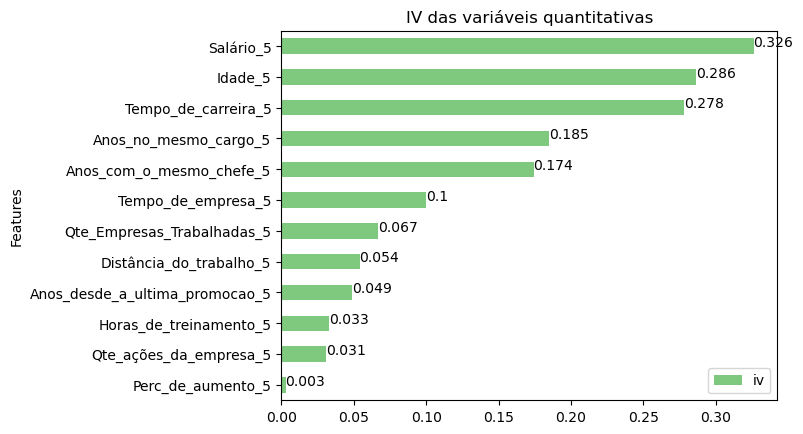

In [58]:
# Plotando grafico do IV com matplotlib

# variáveis quantitativas com faixas definidas

columns_faixas = [
    "Idade_5",
    "Distância_do_trabalho_5",
    "Salário_5",
    "Qte_Empresas_Trabalhadas_5",
    "Perc_de_aumento_5",
    "Qte_ações_da_empresa_5",
    "Tempo_de_carreira_5",
    "Horas_de_treinamento_5",
    "Tempo_de_empresa_5",
    "Anos_no_mesmo_cargo_5",
    "Anos_desde_a_ultima_promocao_5",
    "Anos_com_o_mesmo_chefe_5",
]


iv_quantitativas = []

# Loop para calcular o IV de cada variável
for i in columns_faixas:
    df_woe_iv = (
        pd.crosstab(df[i], df["Funcionário_deixou_a_empresa"], normalize="columns")
        .assign(woe=lambda dfx: np.log(dfx["Sim"] / dfx["Não"]))
        .assign(iv=lambda dfx: np.sum(dfx["woe"] * (dfx["Sim"] - dfx["Não"])))
    )
    iv_quantitativas.append(df_woe_iv["iv"].iloc[0])  # Armazena o valor de IV

# Criando um dataframe com as variáveis e seus respectivos IVs
df_iv_quantitativas = (
    pd.DataFrame({"Features": columns_faixas, "iv": iv_quantitativas})
    .set_index("Features")
    .sort_values(by="iv")
)

display(df_iv_quantitativas)

# Plot
# Figura
plt.figure(figsize=(10, 12))
df_iv_quantitativas.plot(
    kind="barh", title="IV das variáveis quantitativas", colormap="Accent"
)
for index, value in enumerate(list(round(df_iv_quantitativas["iv"], 3))):
    plt.text(value, index, str(value))
plt.legend(loc="lower right")
plt.show()

In [59]:
# Usando o plotly

columns_faixas = [
    "Idade_5",
    "Distância_do_trabalho_5",
    "Salário_5",
    "Qte_Empresas_Trabalhadas_5",
    "Perc_de_aumento_5",
    "Qte_ações_da_empresa_5",
    "Tempo_de_carreira_5",
    "Horas_de_treinamento_5",
    "Tempo_de_empresa_5",
    "Anos_no_mesmo_cargo_5",
    "Anos_desde_a_ultima_promocao_5",
    "Anos_com_o_mesmo_chefe_5",
]

# Lista para armazenar o IV
iv_quantitativas = []

# Loop para calcular o IV de cada variável
for i in columns_faixas:
    df_woe_iv = (
        pd.crosstab(df[i], df["Funcionário_deixou_a_empresa"], normalize="columns")
        .assign(woe=lambda dfx: np.log(dfx["Sim"] / dfx["Não"]))
        .assign(iv=lambda dfx: np.sum(dfx["woe"] * (dfx["Sim"] - dfx["Não"])))
    )
    iv_quantitativas.append(df_woe_iv["iv"].iloc[0])  # Armazena o valor de IV

# Criando um dataframe com as variáveis e seus respectivos IVs
df_iv_quantitativas = (
    pd.DataFrame({"Features": columns_faixas, "iv": iv_quantitativas})
    .set_index("Features")
    .sort_values(by="iv")
)


# Plot
# Plot
fig_quantitativas = px.bar(
    df_iv_quantitativas,
    y=df_iv_quantitativas.index,
    x="iv",
    orientation="h",
    title="IV das variáveis quantitativas",
    width=800,
)

# adicionando os valores das barras
fig_quantitativas.update_layout(
    annotations=[
        dict(
            x=df_iv_quantitativas.iloc[i]["iv"],
            y=df_iv_quantitativas.index[i],
            text=str(round(df_iv_quantitativas.iloc[i]["iv"], 3)),
            xanchor="left",
            yanchor="middle",
            showarrow=False,
        )
        for i in range(len(df_iv_quantitativas))
    ]
)

fig_quantitativas.show()

### **Verificar a taxa de turnover atual (% pessoas que saíram / total de funcionários).**

In [60]:
# Criando um DataFrame para a variavel "Funcionário_deixou_a_empresa" com sua frequencia absoluta e frequencia relativa

frequencia_absoluta = df["Funcionário_deixou_a_empresa"].value_counts()

frequencia_relativa = (
    df["Funcionário_deixou_a_empresa"].value_counts(normalize=True) * 100
)
frequencia_relativa = frequencia_relativa.round(2)

frequencia = pd.DataFrame(
    {
        "Frequência Absoluta": frequencia_absoluta,
        "Frequência Relativa": frequencia_relativa.round(2),
    }
)

frequencia.style.highlight_min(subset="Frequência Relativa", color="red")  # type: ignore

,Frequência Absoluta,Frequência Relativa
Funcionário_deixou_a_empresa,,
Não,1233,83.880000
Sim,237,16.120000


### Funcionário_deixou_a_empresa X Estado_Civil

In [61]:
# Análise bidimensional entre as variáveis "Funcionário_deixou_a_empresa" e "Estado_Civil"

# Definir a ordem desejada das categorias
ordem_estado_civil = ["Solteiro", "Casado", "Divorciado"]

# Reordenar as categorias da coluna 'Estado_civil'
df["Estado_Civil"] = pd.Categorical(
    df["Estado_Civil"], categories=ordem_estado_civil, ordered=True
)

# Calcular a frequência absoluta
freq_abs = (
    df.groupby("Funcionário_deixou_a_empresa")["Estado_Civil"]
    .value_counts()
    .unstack(fill_value=0)
)

display(freq_abs.T)

# Calcular a frequência relativa
freq_rel = round(freq_abs.div(freq_abs.sum(axis=1), axis=0) * 100)

display(freq_rel.T)

# Calcular a frequência acumulada em percentual
freq_acum_pct = freq_rel.cumsum(axis=1)

display(freq_acum_pct.T)


# Gráfico bidimensional entre as variáveis "Funcionário_deixou_a_empresa" e "Estado_Civil"
import plotly.graph_objects as go  # noqa: E402

# Plot com plotly um grafico de barras para cada categoria de "Estado_Civil"
fig = px.bar(
    freq_abs.T,
    x=["Solteiro", "Casado", "Divorciado"],
    y="Sim",
    title="Funcionários que deixaram a empresa por Estado Civil",
    labels={"Sim": "Frequência Absoluta", "x": "Estado Civil"},
    height=400,
    text="Sim",
)

# Adicionar o gráfico de linha ao gráfico de barras existentes
fig.add_trace(
    go.Scatter(
        x=["Solteiro", "Casado", "Divorciado"],
        y=freq_acum_pct.T["Sim"],
        text=freq_acum_pct.T["Sim"],
        mode="lines+markers+text",
        name="Frequência Acumulada %",
        textposition="top center",
    )
)

# exibir o grafico
fig.show()

Funcionário_deixou_a_empresa,Não,Sim
Estado_Civil,,
Solteiro,350,120
Casado,589,84
Divorciado,294,33


Funcionário_deixou_a_empresa,Não,Sim
Estado_Civil,,
Solteiro,28.0,51.0
Casado,48.0,35.0
Divorciado,24.0,14.0


Funcionário_deixou_a_empresa,Não,Sim
Estado_Civil,,
Solteiro,28.0,51.0
Casado,76.0,86.0
Divorciado,100.0,100.0


### Funcionário_deixou_a_empresa X Faz_hora_extras?

In [62]:
# Análise bidimensional entre as variáveis "Funcionário_deixou_a_empresa" e "Faz_hora_extras?"

# Calcular a frequência absoluta
freq_abs = (
    df.groupby("Funcionário_deixou_a_empresa")["Faz_hora_extras?"]
    .value_counts()
    .unstack(fill_value=0)
)

display(freq_abs.T)

# Calcular a frequência relativa
freq_rel = round(freq_abs.div(freq_abs.sum(axis=1), axis=0) * 100)

display(freq_rel.T)

# Calcular a frequência acumulada em percentual
freq_acum_pct = freq_rel.cumsum(axis=1)

display(freq_acum_pct.T)


# Criando o grafico de pizza com plotly usando a frequencia relativa
fig = px.pie(
    freq_rel.T,
    values="Sim",
    names=["Não", "Sim"],
    title="Funcionários que deixaram a empresa X Fizeram hora extra?",
    height=400,
    width=800,
    color_discrete_sequence=["#2ca02c", "#d62728"],
)

# exibir o grafico
fig.show()

Funcionário_deixou_a_empresa,Não,Sim
Faz_hora_extras?,,
Não,944,110
Sim,289,127


Funcionário_deixou_a_empresa,Não,Sim
Faz_hora_extras?,,
Não,77.0,46.0
Sim,23.0,54.0


Funcionário_deixou_a_empresa,Não,Sim
Faz_hora_extras?,,
Não,77.0,46.0
Sim,100.0,100.0


### Funcionário_deixou_a_empresa X Salário

In [63]:
# Análise bidimensional entre as variáveis "Funcionário_deixou_a_empresa" e "Salário_5?"

# Calcular a frequência absoluta ordenada do maior pro menor valor da coluna "Sim"
freq_abs = (
    df.groupby("Funcionário_deixou_a_empresa")["Salário_5"]
    .value_counts()
    .unstack(fill_value=0)
)

display(freq_abs.T)

# Calcular a frequência relativa
freq_rel = round(freq_abs.div(freq_abs.sum(axis=1), axis=0) * 100)

display(freq_rel.T)

# Calcular a frequência acumulada em percentual
freq_acum_pct = freq_rel.cumsum(axis=1)

display(freq_acum_pct.T)

# Criando grafico de barras dos intervalos de Salário_5 com os valores de frequencia absoluta da coluna "Sim"
fig = px.bar(
    freq_abs.T,
    x=[
        "0-2500",
        "2501-5000",
        "5001-7500",
        "7501-10000",
        "10001-15000",
        "15001-20000",
    ],
    y="Sim",
    title="Funcionários que deixaram a empresa por faixa Salário",
    labels={"Sim": "Frequência Absoluta", "x": "faixas de Salários"},
    height=400,
    text="Sim",
)

# Adicionar o gráfico de linha da frequencia acumulada ao gráfico de barras existentes
fig.add_trace(
    go.Scatter(
        x=[
            "0-2500",
            "2501-5000",
            "5001-7500",
            "7501-10000",
            "10001-15000",
            "15001-20000",
        ],
        y=freq_acum_pct.T["Sim"],
        text=freq_acum_pct.T["Sim"],
        mode="lines+markers+text",
        name="Frequência Acumulada %",
        textposition="top center",
    )
)

# exibir o grafico
fig.show()

Funcionário_deixou_a_empresa,Não,Sim
Salário_5,,
0-2500,437,140
2501-5000,419,52
5001-7500,145,30
7501-10000,84,8
10001-15000,50,2
15001-20000,98,5


Funcionário_deixou_a_empresa,Não,Sim
Salário_5,,
0-2500,35.0,59.0
2501-5000,34.0,22.0
5001-7500,12.0,13.0
7501-10000,7.0,3.0
10001-15000,4.0,1.0
15001-20000,8.0,2.0


Funcionário_deixou_a_empresa,Não,Sim
Salário_5,,
0-2500,35.0,59.0
2501-5000,69.0,81.0
5001-7500,81.0,94.0
7501-10000,88.0,97.0
10001-15000,92.0,98.0
15001-20000,100.0,100.0


### Funcionário_deixou_a_empresa X Idade

In [66]:
# Análise bidimensional entre as variáveis "Funcionário_deixou_a_empresa" e "Idade_5"

# Calcular a frequência absoluta ordenada do maior pro menor valor da coluna "Sim"
freq_abs = (
    df.groupby("Funcionário_deixou_a_empresa")["Idade_5"]
    .value_counts()
    .unstack(fill_value=0)
)

display(freq_abs.T)

# Calcular a frequência relativa
freq_rel = round(freq_abs.div(freq_abs.sum(axis=1), axis=0) * 100)

display(freq_rel.T)

# Calcular a frequência acumulada em percentual
freq_acum_pct = freq_rel.cumsum(axis=1)

display(freq_acum_pct.T)

# Criando grafico de barras dos intervalos de Idade_5 com os valores de frequencia absoluta da coluna "Sim"
fig = px.bar(
    freq_abs.T,
    x=["18-25", "26-35", "36-45", "46-55", "56-65"],
    y="Sim",
    title="Funcionários que deixaram a empresa por faixa de Idades",
    labels={"Sim": "Frequência Absoluta", "x": "faixa de Idades"},
    height=400,
    text="Sim",
)

# Adicionar o gráfico de linha da frequencia acumulada ao gráfico de barras existentes
fig.add_trace(
    go.Scatter(
        x=["18-25", "26-35", "36-45", "46-55", "56-65"],
        y=freq_acum_pct.T["Sim"],
        text=freq_acum_pct.T["Sim"],
        mode="lines+markers+text",
        name="Frequência Acumulada %",
        textposition="top center",
    )
)

# exibir o grafico
fig.show()


Funcionário_deixou_a_empresa,Não,Sim
Idade_5,,
18-25,106,56
26-35,395,94
36-45,427,45
46-55,197,26
56-65,108,16


Funcionário_deixou_a_empresa,Não,Sim
Idade_5,,
18-25,9.0,24.0
26-35,32.0,40.0
36-45,35.0,19.0
46-55,16.0,11.0
56-65,9.0,7.0


Funcionário_deixou_a_empresa,Não,Sim
Idade_5,,
18-25,9.0,24.0
26-35,41.0,64.0
36-45,76.0,83.0
46-55,92.0,94.0
56-65,101.0,101.0


### Funcionário_deixou_a_empresa X Tempo de carreira

In [69]:
# Análise bidimensional entre as variáveis "Funcionário_deixou_a_empresa" e "Tempo_de_carreira_5"

# Calcular a frequência absoluta ordenada do maior pro menor valor da coluna "Sim"
freq_abs = (
    df.groupby("Funcionário_deixou_a_empresa")["Tempo_de_carreira_5"]
    .value_counts()
    .unstack(fill_value=0)
)

display(freq_abs.T)

# Calcular a frequência relativa
freq_rel = round(freq_abs.div(freq_abs.sum(axis=1), axis=0) * 100)

display(freq_rel.T)

# Calcular a frequência acumulada em percentual
freq_acum_pct = freq_rel.cumsum(axis=1)

display(freq_acum_pct.T)

# Criando grafico de barras dos intervalos de Tempo_de_carreira_5 com os valores de frequencia absoluta da coluna "Sim"
fig = px.bar(
    freq_abs.T,
    x=["0-5", "6-10", "11-15", "16-20", "21-25", "26-30", "31-35", "36-40"],
    y="Sim",
    title="Funcionários que deixaram a empresa por faixa de Tempo de carreira",
    labels={"Sim": "Frequência Absoluta", "x": "faixa de Tempo de carreira"},
    height=400,
    text="Sim",
)

# alterado o tamanho da fonte do título
fig.update_layout(title_font_size=20)

# Adicionar o gráfico de linha da frequencia acumulada ao gráfico de barras existentes
fig.add_trace(
    go.Scatter(
        x=["0-5", "6-10", "11-15", "16-20", "21-25", "26-30", "31-35", "36-40"],
        y=freq_acum_pct.T["Sim"],
        text=freq_acum_pct.T["Sim"],
        mode="lines+markers+text",
        name="Frequência Acumulada %",
        textposition="top center",
    )
)

# exibir o grafico
fig.show()


Funcionário_deixou_a_empresa,Não,Sim
Tempo_de_carreira_5,,
0-5,225,91
6-10,516,91
11-15,167,24
16-20,134,15
21-25,100,9
26-30,50,2
31-35,30,3
36-40,11,2


Funcionário_deixou_a_empresa,Não,Sim
Tempo_de_carreira_5,,
0-5,18.0,38.0
6-10,42.0,38.0
11-15,14.0,10.0
16-20,11.0,6.0
21-25,8.0,4.0
26-30,4.0,1.0
31-35,2.0,1.0
36-40,1.0,1.0


Funcionário_deixou_a_empresa,Não,Sim
Tempo_de_carreira_5,,
0-5,18.0,38.0
6-10,60.0,76.0
11-15,74.0,86.0
16-20,85.0,92.0
21-25,93.0,96.0
26-30,97.0,97.0
31-35,99.0,98.0
36-40,100.0,99.0


# Construir tabelas de medidas resumo para as variáveis quantitativas

In [64]:
# Resumo das variáveis numéricas

df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1470.0,735.500000,424.496761,1.0,368.25,735.5,1102.75,1470.0
Idade,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
Distância_do_trabalho,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Salário,1470.0,6502.931293,4707.956783,1009.0,2911.00,4919.0,8379.00,19999.0
Qte_Empresas_Trabalhadas,1470.0,2.693197,2.498009,0.0,1.00,2.0,4.00,9.0
Perc_de_aumento,1470.0,15.209524,3.659938,11.0,12.00,14.0,18.00,25.0
Qte_ações_da_empresa,1470.0,0.793878,0.852077,0.0,0.00,1.0,1.00,3.0
Tempo_de_carreira,1470.0,11.279592,7.780782,0.0,6.00,10.0,15.00,40.0
Horas_de_treinamento,1470.0,2.799320,1.289271,0.0,2.00,3.0,3.00,6.0
Tempo_de_empresa,1470.0,7.008163,6.126525,0.0,3.00,5.0,9.00,40.0
